In [8]:
# Importing dataset
import pandas as pd
df=pd.read_csv('advertising.csv')
print(df.head())
print("Dataframe shape is = ",df.shape)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Dataframe shape is =  (200, 4)


In [9]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#This time pass all parameters except the sales into x and sales as y
#75-25 ratio train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['Sales'],axis=1),df['Sales'],test_size=0.25)
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
print("Coeffs of the equation = {} \nIntercept = {} ".format(lr.coef_,lr.intercept_))
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*Radio + {:.5}*Newspaper".format(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))

Coeffs of the equation = [0.0538397  0.09897526 0.00489041] 
Intercept = 4.811616951166004 
The linear model is: Y = 4.8116 + 0.05384*TV + 0.098975*Radio + 0.0048904*Newspaper


In [11]:
#Predicting values from test set 
y_pred = lr.predict(x_test)

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error

pred = lr.predict(x_test)

#Finding Root Mean Sqaured Error
rmse=np.sqrt(mean_squared_error(y_test,pred))
#Finiding Mean Absolute Error
mae = mean_absolute_error(y_test,pred)
#Finding Mean Squared Error
mse = mean_squared_error(y_test,pred)
#Printing all error matrics
print("Root Mean Square Srror= {}\nMean Absolute Error = {}\nMean Squared Error = {}".format(rmse,mae,mse))
print("Score",lr.score(df.drop(['Sales'],axis=1),df['Sales']))

Root Mean Square Srror= 1.4328481443520686
Mean Absolute Error = 1.1467813024400073
Mean Squared Error = 2.0530538047731666
Score 0.9018403774259571


In [13]:
def trainOnly2Features(f1,f2):
    print(("Only taking features "+f1+" & "+f2).center(50,'='))
    x_train,x_test,y_train,y_test=train_test_split(df[[f1,f2]],df['Sales'],test_size=0.25)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    #Printing Coeff and intercept of the model
    print("Coeffs of the equation = {} \nIntercept = {} ".format(lr.coef_,lr.intercept_))
    print("The linear model is: Y = {:.5} + {:.5}*{} + {:.5}*{} ".format(lr.intercept_, lr.coef_[0],f1, lr.coef_[1],f2))
    pred = lr.predict(x_test)
    #Finding Root Mean Sqaured Error
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    #Finiding Mean Absolute Error
    mae = mean_absolute_error(y_test,pred)
    #Finding Mean Squared Error
    mse = mean_squared_error(y_test,pred)
    #Printing all error matrics
    print("Root Mean Square Srror= {}\nMean Absolute Error = {}\nMean Squared Error = {}".format(rmse,mae,mse))

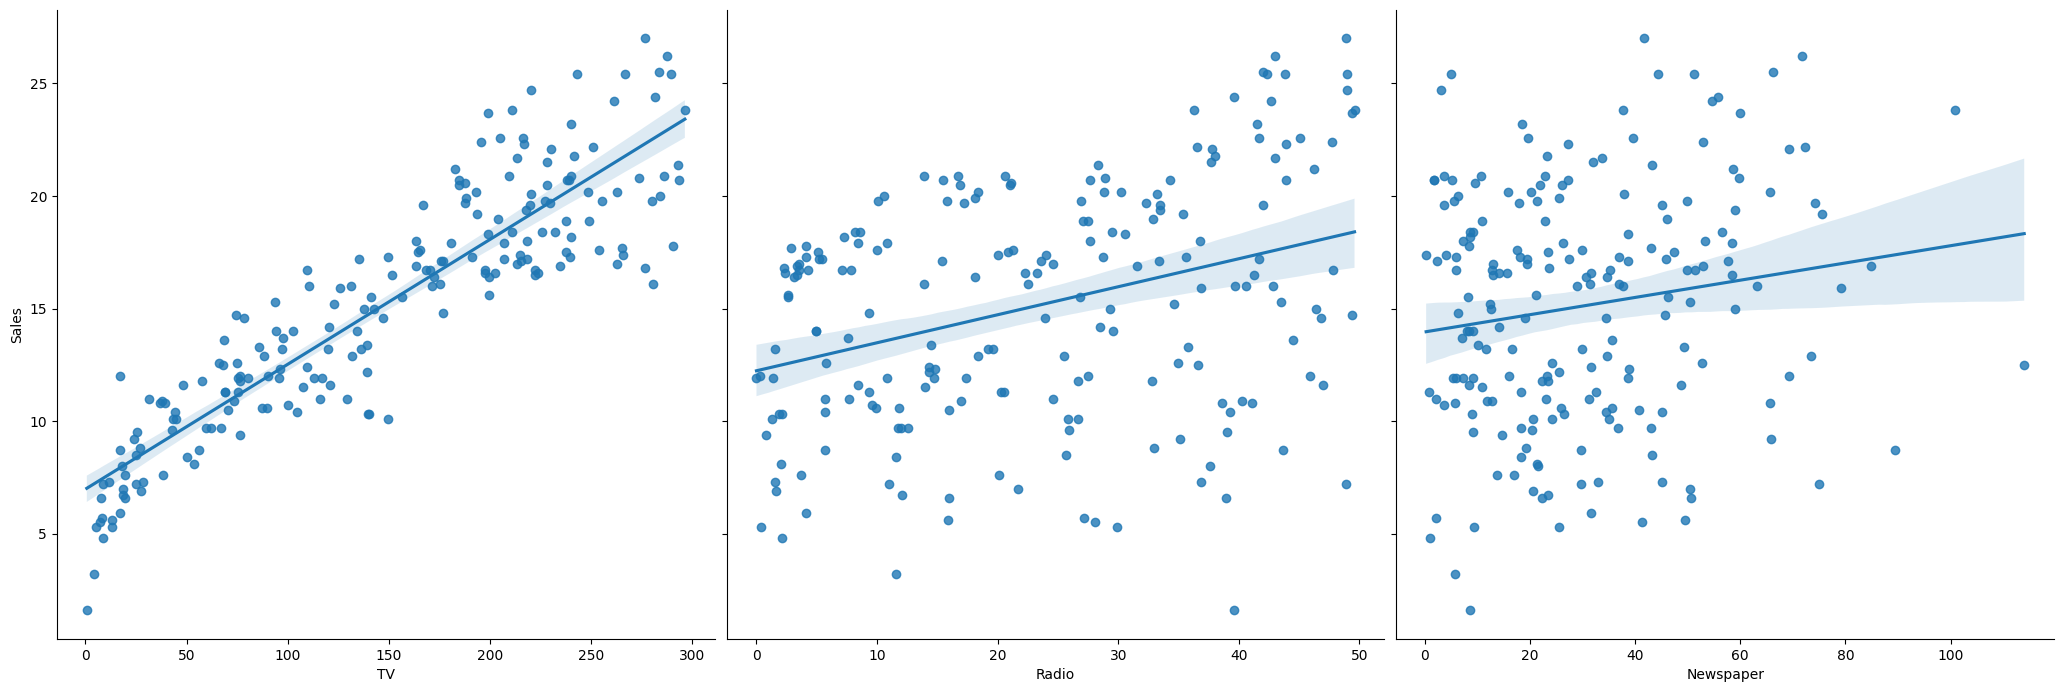

In [14]:
import seaborn as sns

sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg',height=7,aspect=1)

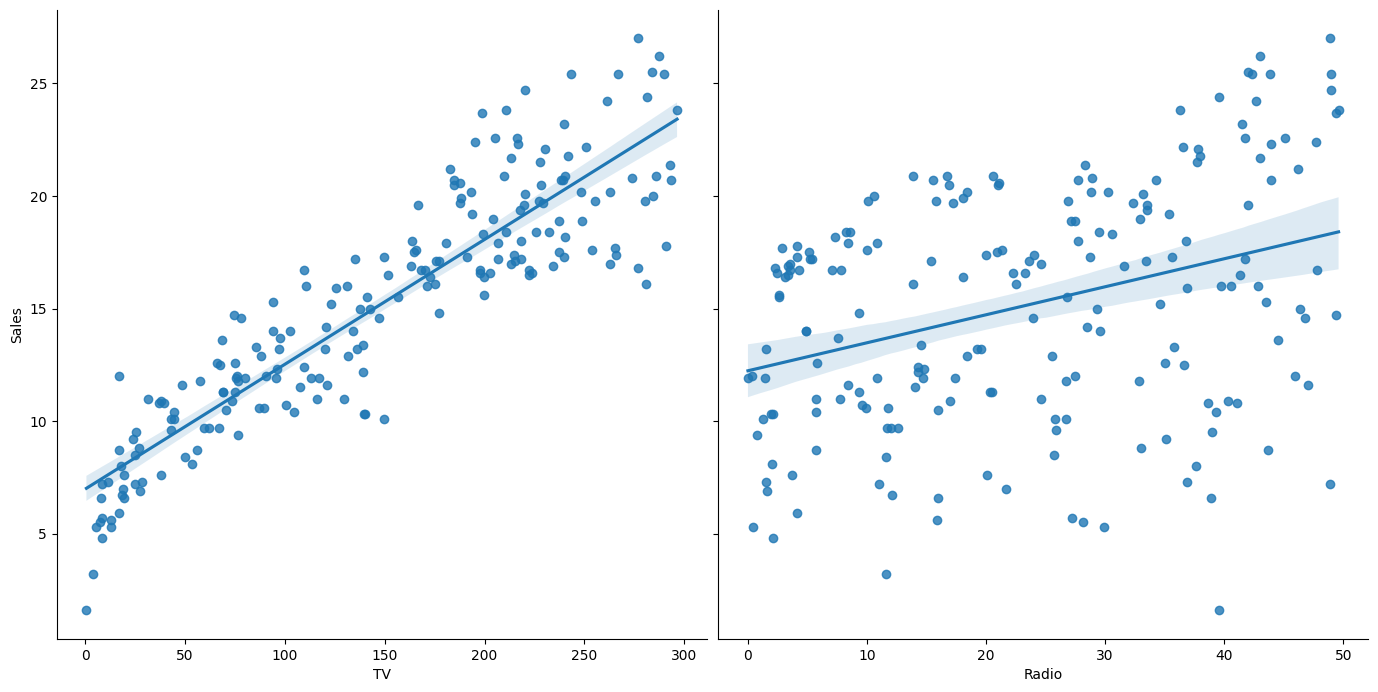

In [15]:
#Since we get least mean square error when we remove newspaper so
sns.pairplot(df,x_vars=['TV','Radio'],y_vars='Sales',kind='reg',height=7,aspect=1)